In [2]:
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from numpy import asarray
from PIL import Image

In [16]:
cap = cv2.VideoCapture(0)
count = 0
while True:
    ret, frame = cap.read()
    count += 1
    face = cv2.resize(frame, (200, 400))
    
    file_name_path = 'C:/Users/Meghna/Documents/Jupyter Notebook/Semester 5/FOML/image/' + str(count) + '.jpg'
    cv2.imwrite(file_name_path, face)
    
    cv2.putText(face, str(count), (50, 50), cv2.FONT_HERSHEY_COMPLEX, 1, (0, 255, 0), 2)
    cv2.imshow('Face Cropper', face)
     
    if cv2.waitKey(1) == 13 or count == 20: #13 is the Enter Key
        break
        
cap.release()
cv2.destroyAllWindows()      
print("Collecting Samples Complete")

In [17]:
import os
def get_image_array(path): # converts to an array 
    image_list = os.listdir(path)
    images = []
    
    for img in image_list:
        img = cv2.imread(path + '/' + img, 0)
        images.append(img)
    return np.array(images)

In [18]:
img = 'C:/Users/Meghna/Documents/Jupyter Notebook/Semester 5/FOML/image/'

In [19]:
img1 = get_image_array(img)

In [20]:
img1.shape
# m -> 20
# nx -> 400*200

(20, 400, 200)

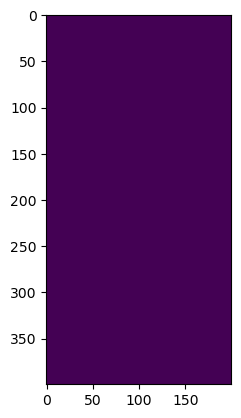

In [21]:
plt.imshow(img1[0])

In [24]:
img1 = img1/255.0
# img1 = img1.reshape(20,img1.shape[1])

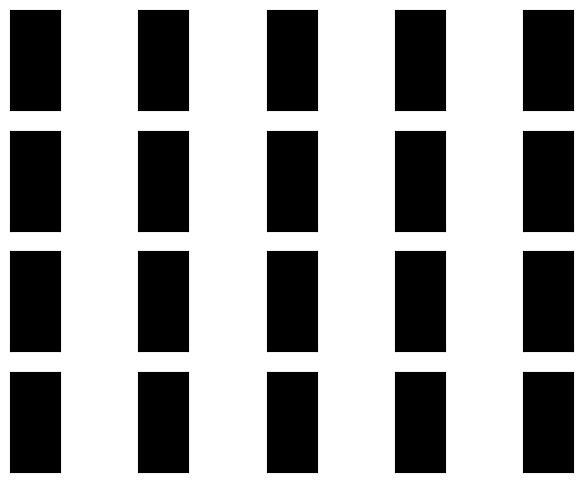

In [23]:
fig = plt.figure(figsize = (8, 6))
for i in range(20):
    ax = fig.add_subplot(4, 5, i+1, xticks =[], yticks = [])
    ax.imshow(img1[i], cmap = plt.cm.bone)

In [ ]:
# exam pov -> need to create a y 

In [25]:
y = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
y = np.asarray(y)

In [26]:
len(y)

20

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
# x_train, y_train, x_test, y_test = train_test_split(img1, y, test_size = 0.2, random_state = 42)
train_images, test_images, train_labels, test_labels = train_test_split(img1, y, test_size = 0.2, random_state = 42)

In [30]:
train_images.shape

(16, 400, 200)

In [31]:
train_labels.shape

(16,)

In [32]:
test_images.shape

(4, 400, 200)

In [33]:
test_labels.shape

(4,)

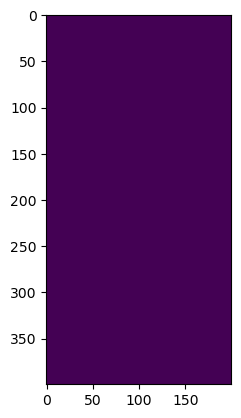

In [34]:
plt.imshow(train_images[0])

In [35]:
print(train_labels)
print(test_labels)

[1 1 0 1 0 0 0 1 1 0 1 0 1 0 0 1]
[1 0 0 1]


In [36]:
network = Sequential()
network.add(Dense(128, activation = 'relu', input_shape = (400*200, )))
network.add(Dense(1, activation = 'sigmoid'))

In [37]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               10240128  
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 10240257 (39.06 MB)
Trainable params: 10240257 (39.06 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [38]:
network.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [39]:
train_images = train_images.reshape((16, 400*200))
train_images = train_images.astype('float32')/255

test_images = test_images.reshape((4, 400*200))
test_images = test_images.astype('float32')/255

In [40]:
print(train_images.shape)
print(test_images.shape)

(16, 80000)
(4, 80000)


In [41]:
# from tensorflow.keras.utils import to_categorical, to

In [42]:
# train_labels = to_categorical(train_labels)

In [43]:
# test_labels = to_categorical(test_labels)

In [44]:
# train_labels[:, 1]

In [45]:
print(train_labels.shape)
print(train_images.shape)

(16,)
(16, 80000)


In [46]:
# train_labels = train_labels.reshape(-1, 1)
# test_labels = test_labels.reshape(-1, 1)

In [47]:
# network.fit(train_images, train_labels, epochs=5, batch_size = 128)

Epoch 1/5
1/1 [==============================] - 0s 371ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 2/5
1/1 [==============================] - 0s 73ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 3/5
1/1 [==============================] - 0s 82ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 4/5
1/1 [==============================] - 0s 75ms/step - loss: 0.6931 - accuracy: 0.5000
Epoch 5/5
1/1 [==============================] - 0s 75ms/step - loss: 0.6931 - accuracy: 0.5000


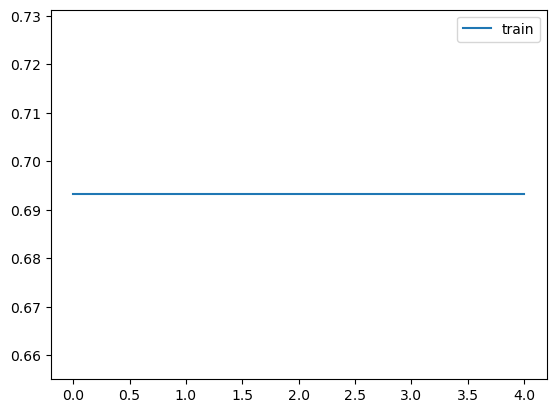

In [48]:
history_X = network.fit(train_images, train_labels, epochs=5, batch_size = 128)
plt.plot(history_X.history['loss'], label = 'train')
plt.legend()
plt.show()

In [49]:
test_loss, test_accuracy = network.evaluate(test_images, test_labels)
print('test_loss ' + str(test_loss))
print('test_accuracy ' + str(test_accuracy))

1/1 [==============================] - 0s 94ms/step - loss: 0.6931 - accuracy: 0.5000
test_loss 0.6931471824645996
test_accuracy 0.5


In [50]:
import numpy as np  # Import NumPy if not already imported

# Assuming you have a single test image and its label
single_test_image = test_images[2]  # Replace 0 with the index of the image you want to test
single_test_label = test_labels[2]  # Replace 0 with the corresponding label

# Preprocess the single test image (e.g., normalize it if needed)
# You should apply the same preprocessing as you did during training
# For example, if you normalized the training data, normalize this image as well

# Reshape the single test image if needed
# If your network expects a specific input shape, make sure to reshape the image accordingly
# For example, if your network expects (28, 28, 1) shape and your image is (28, 28), do:
# single_test_image = np.expand_dims(single_test_image, axis=-1)

# Convert the single test image to a NumPy array and normalize it
single_test_image = np.array(single_test_image) / 255.0  # Normalize assuming pixel values are in [0, 255]

# Make predictions on the single test image
predictions = network.predict(np.expand_dims(single_test_image, axis=0))  # Add an extra dimension for batch size

# Calculate the predicted class label
predicted_class = np.argmax(predictions, axis=1)[0]  # Extract the class with the highest probability

# Compare the predicted class to the true class label
if predicted_class == single_test_label:
    print("Prediction is correct!")
else:
    print("Prediction is incorrect!")

# Optionally, you can print the confidence scores for each class
print("Class probabilities:", predictions)

1/1 [==============================] - 0s 55ms/step
Prediction is correct!
Class probabilities: [[0.50000006]]
